# This is your intro to Jove, a software system written by Ganesh Gopalakrishnan, for teaching Automata and Logic. 

### If you are new to colab, follow instructions fro https://colab.research.google.com/

## **Begin by watching the video https://bit.ly/TeachJoveAutomata**

### Following instructions you learned in that video, run each cell below, and then follow the lecture material

### Any time your screen gets cluttered with too much output, **go to Edit and hit "clear outputs"**


In [1]:
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
 
from jove.LangDef   import *  #-- mainly for nthnumeric
from jove.Def_md2mc import *  #-- for md2mc
from jove.Def_DFA   import *  #-- for all DFA functions
from jove.DotBashers import * #-- for dotObj_dfa

from jove.Def_NFA import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import * #-- to check Even010 via RE and NFA
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 6255, done.
remote: Counting objects: 100% (1621/1621), done.
remote: Compressing objects: 100% (629/629), done.
remote: Total 6255 (delta 947), reused 1586 (delta 924), pack-reused 4634
Receiving objects: 100% (6255/6255), 9.22 MiB | 13.34 MiB/s, done.
Resolving deltas: 100% (3952/3952), done.
You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
hel

# Reusing Assignment-3 of CS 3100, Fall 2022 to impart some background for CS 6110

## If you want the lecture videos from CS 3100, please write on Piazza and the TM shall provide

The whole practice problem I'm assigning is to design a minimal DFA from a complicated regular expression given below.

There is very little chance that you can directly design this DFA correctly. Instead, I'm giving you the construction pathway -- and by doing so, you'll remember enough of your automata theory (or it is OK to learn it for the first time, too -- but you must ask me or my TM)

# Question 1: 

## **Part A: Follow the demo in the rest of this notebook, and obtain the minimal DFA for the following regular language**

 
 $ L =   ( \;\; \overline {\{0,1\}^* \; \{010\}\; \{0,1\}^* }\;\; (010) \;\; \overline {\{0,1\}^* \{010\}\{0,1\}^*} \;\; (010)\;\; )*  $



## **Part B: In the space AT THE END OF THIS COLAB NOTEBOOK, do the same construction for the following regular language**

# SOLUTION CELLS FOLLOW for **Part A**

## **We solve Part-A by first attacking an important inner-piece of the above language's RE**

$L_{010}$ = $    \{0,1\}^* \{010\}\{0,1\}^*  $

In [3]:
L010 =  "(0+1)*010(0+1)*" # <-- "I filled the regexp for L_010 above  here " 

## **We recall that $L_{010}$ had to be complemented in the final language $L$.** Unfortunately, our RE language does not include complements. Your task is to pay attention to lectures Lec7 on and find a way to obtain a regular expression for $ LC_{010} = \overline {  \{0,1\}^* \{010\}\{0,1\}^*  } $. The steps are up to you to design.




# SOLUTION CELLS for this phase of your work now follow

## **The solutions culminate in a regular expression** RE_comp_L010

In [4]:
comp_mindfa_L010 = comp_dfa(min_dfa(nfa2dfa(re2nfa( L010)))) # -- steps with documentation

Generating LALR tables


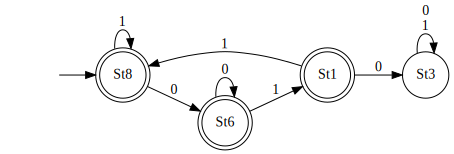

In [5]:
dotObj_dfa(comp_mindfa_L010, FuseEdges=True)

In [6]:
comp_mindfa_L010_nfa = dfa2nfa(comp_mindfa_L010)

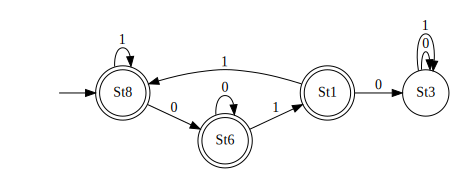

In [7]:
dotObj_nfa(comp_mindfa_L010_nfa)

In [18]:
comp_mindfa_L010_gnfa = mk_gnfa(comp_mindfa_L010_nfa) # -- steps with documentation (add as many)

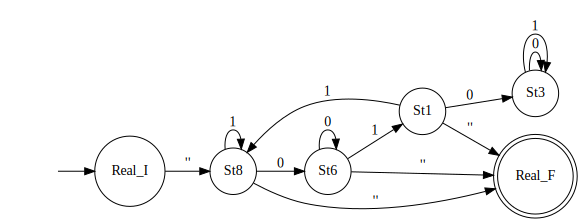

In [20]:
dotObj_gnfa(comp_mindfa_L010_gnfa)

In [21]:
(gnfa_final_comp_L010,do,RE_comp_L010) = del_gnfa_states(comp_mindfa_L010_gnfa)

**** Eliminating state St6 ****
**** Eliminating state St1 ****
**** Eliminating state St3 ****
**** Eliminating state St8 ****


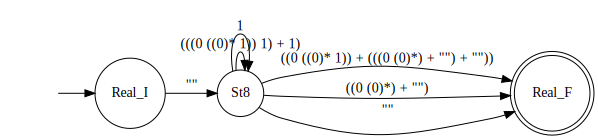

In [22]:
do[3]

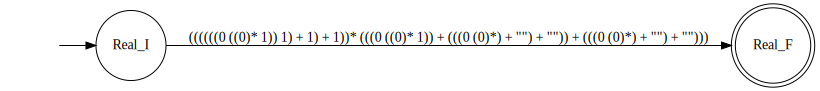

In [23]:
do[4]

# **Below is where you see the result of L010 complemented,** called RE_comp_L010

In [24]:
RE_comp_L010

'((((((0 ((0)* 1)) 1) + 1) + 1))* (((0 ((0)* 1)) + (((0 (0)*) + "") + "")) + (((0 (0)*) + "") + "")))'

# Now we will **visually check** that this extracted RE is correct, by re-converting it to a minimal DFA. (Automated checks can be done.)

In [25]:
check = min_dfa(nfa2dfa(re2nfa(RE_comp_L010)))

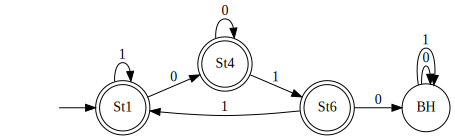

In [26]:
dotObj_dfa_w_bh(check)

# **Now we paste together the regular expression for the WHOLE DFA for $L$ that was non-obvious from the beginning!!**

In [27]:
L_RE = "( " + RE_comp_L010 + "(010)" + RE_comp_L010 + "(010)" + " )*"

# If you are following things, you'll now realize that the language $ L =   ( \;\; \overline {\{0,1\}^* \; \{010\}\; \{0,1\}^* }\;\; (010) \;\; \overline {\{0,1\}^* \{010\}\{0,1\}^*} \;\; (010)\;\; )*  $ has now been turned into an RE, called L_RE, below !!

## **Any confusion? Ask questions now!**

In [28]:
L_RE

'( ((((((0 ((0)* 1)) 1) + 1) + 1))* (((0 ((0)* 1)) + (((0 (0)*) + "") + "")) + (((0 (0)*) + "") + "")))(010)((((((0 ((0)* 1)) 1) + 1) + 1))* (((0 ((0)* 1)) + (((0 (0)*) + "") + "")) + (((0 (0)*) + "") + "")))(010) )*'

# *Now finish all the steps to write out the correct DFA for $L$. Call it Correct010DFA.* **Notice that this DFA is still unminimized !!**

In [41]:
Correct010DFA_unmin = nfa2dfa(re2nfa(L_RE))


In [42]:
Correct010DFA_unmin["F"]

{'St19',
 'St20',
 'St21',
 'St22',
 'St23',
 'St24',
 'St25',
 'St26',
 'St27',
 'St31',
 'St32',
 'St33'}

# **And now, let's view the final DFA for $L$ we wanted all along.**

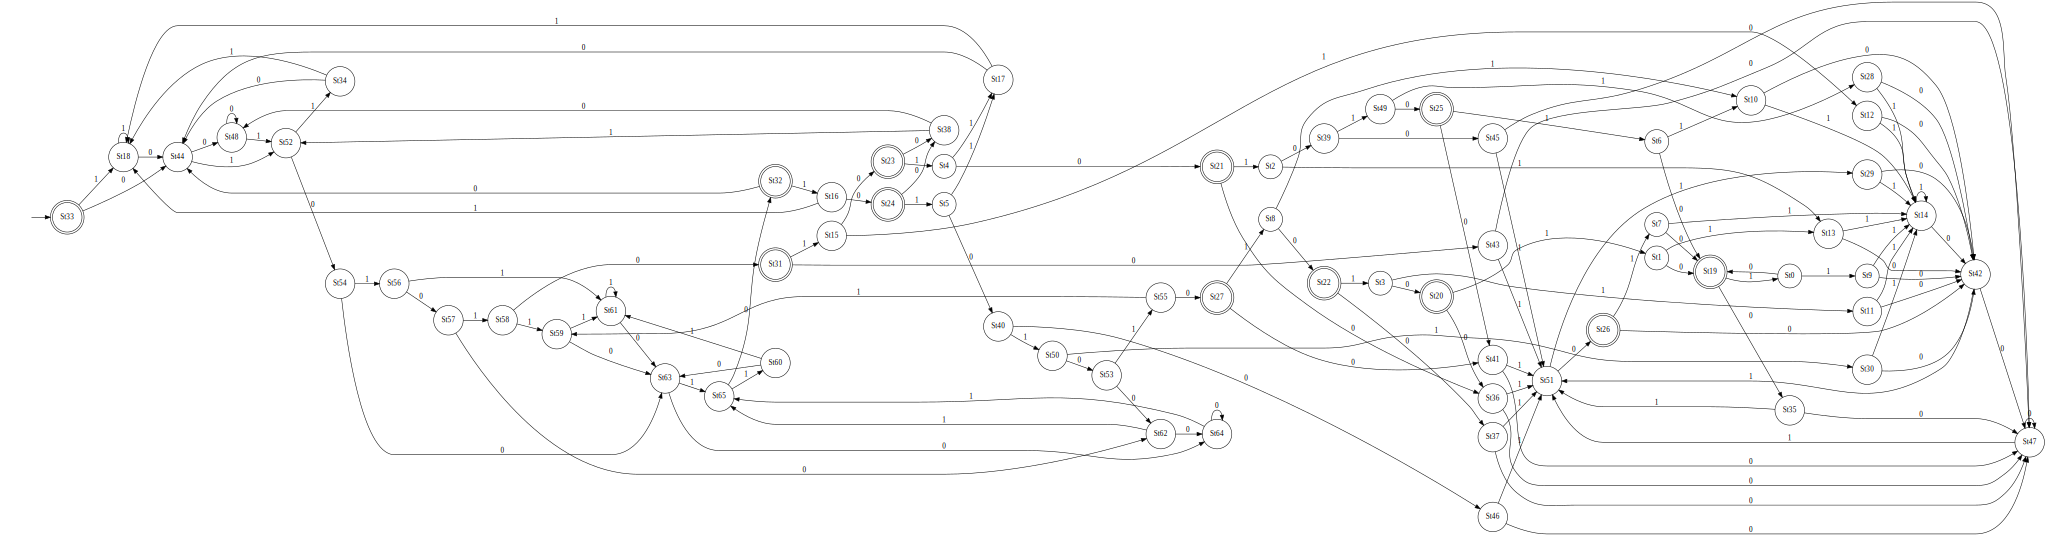

In [43]:
dotObj_dfa(Correct010DFA_unmin)

# **How many states does it have?**

In [44]:
len(Correct010DFA_unmin["Q"])

66

# **Now minimize and see how many states!**

In [45]:
Correct010DFA = min_dfa(Correct010DFA_unmin)

In [46]:
len(Correct010DFA["Q"])

28

# **We reduced a 66-state DFA to a 28-state DFA. Could you have designed any of these by hand??**

# Now run __seven__ MustPass and __three__ MustFail tests through Correct101DFA. 

## Your tests must include these MustPass  (add one more to make seven). Blanks added for readability only! There are seven final states, so the full list of seven test strings __must hit each of the seven final states!__ . A few extra ones from your side are OK; mark them as "extra ones".


### 010   010       
       
### 01     010   101   010  

### 1      010   101   010  

### 110    010   001   010

### three more

## 010 1010

## 01010101010010

## ''


In [47]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

 "help(AnimateDFA)" gives you info on how to use animations with DFA 


In [ ]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [ ]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [ ]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [ ]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [ ]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [ ]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

# SOLUTION CELLS FOLLOW


## Your tests must include these MustFail  (add one more to make three). Blanks added for readability only! A few more than three is OK. Mark it as "extra ones from your side".


### 010    010   010  010 010

### 010010 010   010010  010 1

## 1

 

In [ ]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [ ]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [ ]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

# **Someone proposes this Even010 DFA as their manual design. See if that machine is even close!**

In [49]:
Even010 = md2mc('''
DFA 

!! Put comments describing overall plan here. Look at 00_Overview_Of_CS3100 for commenting conventions

!!  
 
!! ... After key lines of the DFA, put short comments specific to the line ...
!! ... Also, group lines for each state in nice bunches ...
 
IF  : 0 -> S0
IF  : 1 -> S1

S0  : 0 -> S0

S0  : 1 -> S01

S01 : 0 -> S010
S01 : 1 -> S1

S1 : 1 -> S1

S1 : 0 -> S0

S010    : 0 -> S0100
S010    : 1 -> S010

S0100   : 0 -> S0100

S0100   : 1 -> S01001

S01001  : 0 -> IF
S01001  : 1 -> S010
 
''')

Generating LALR tables


# 1g (10 pts): Now suppose someone believes that the DFA Even010 (__above__) is right for L. 

## Now, **Exhibit all the strings that are in Correct010DFA that are not in Even010 -- __as a DFA__ .**

## That means, obtain an entire DFA capturing all the missing strings! Call it MissedDFA. __In your answer, present how many states the minimal MissedDFA has!__

# SOLUTION CELLS FOLLOW

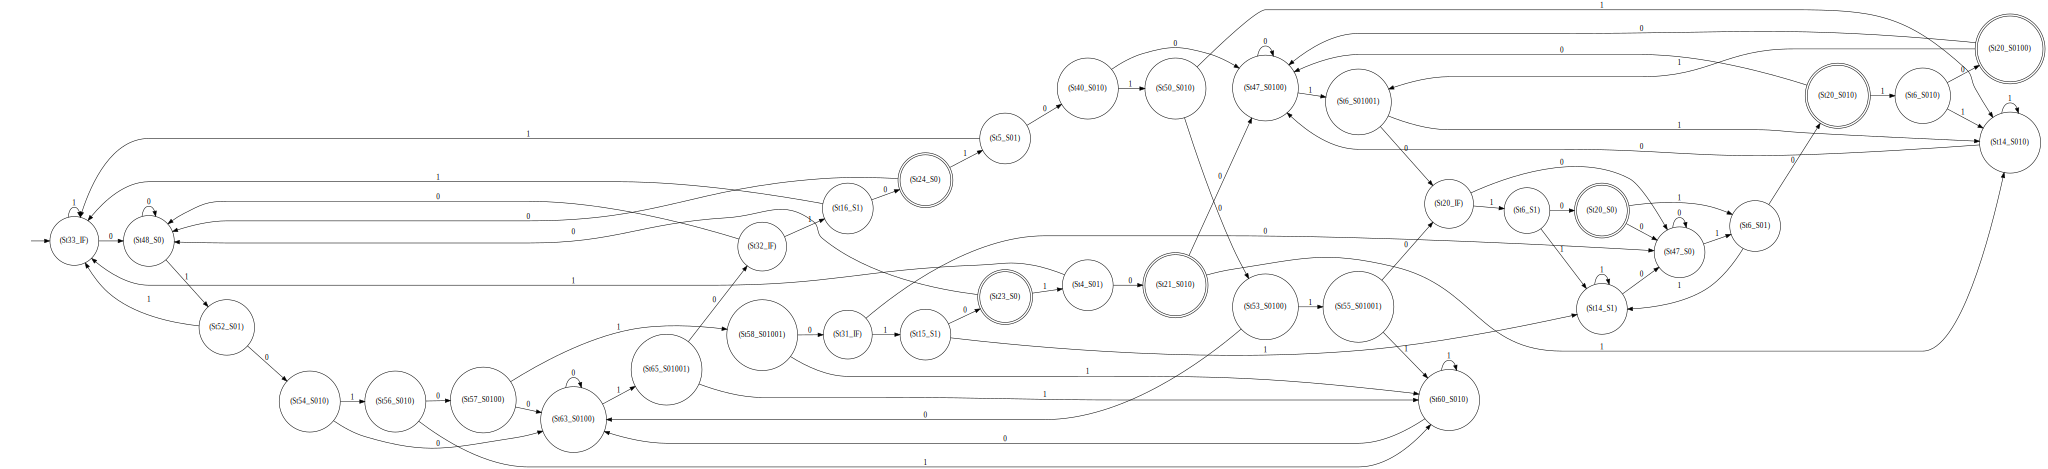

In [52]:
#-- Steps that list MissedDFA  are below
#-- 
MissedDFA = min_dfa(intersect_dfa(Correct010DFA, comp_dfa(Even010)))


dotObj_dfa(MissedDFA)


# This part requires reading some of the Jove tutorials, and will be demoed in class.

## Generate MissedDFA in steps below, and print it using dotObj_dfa. Then  run this DFA via numeric order enumeration and find out 10 strings present in this MissedDFA (that were missing in Even010 DFA).

# SOLUTION CELLS FOLLOW

In [53]:
#-- Steps that that tell us what was missed by Even010 DFA. What you missed must appear as a numeric order listing with five "Accept" strings (more is OK)

#-- 
TestStrings = [nthnumeric(i, ['0','1']) for i in range(32)]

for test in TestStrings:
    if accepts_dfa(MissedDFA, test):
        print("MissedDFA accepts ", test)
    else:
        print("MissedDFA rejects ", test)   

MissedDFA rejects  
MissedDFA rejects  0
MissedDFA rejects  1
MissedDFA rejects  00
MissedDFA rejects  01
MissedDFA rejects  10
MissedDFA rejects  11
MissedDFA rejects  000
MissedDFA rejects  001
MissedDFA rejects  010
MissedDFA rejects  011
MissedDFA rejects  100
MissedDFA rejects  101
MissedDFA rejects  110
MissedDFA rejects  111
MissedDFA rejects  0000
MissedDFA rejects  0001
MissedDFA rejects  0010
MissedDFA rejects  0011
MissedDFA rejects  0100
MissedDFA rejects  0101
MissedDFA rejects  0110
MissedDFA rejects  0111
MissedDFA rejects  1000
MissedDFA rejects  1001
MissedDFA rejects  1010
MissedDFA rejects  1011
MissedDFA rejects  1100
MissedDFA rejects  1101
MissedDFA rejects  1110
MissedDFA rejects  1111
MissedDFA rejects  00000


# **The above is boring and not going anywhere. Onto higher-order functions!! Increase 32 to something very large**

In [55]:
TestStrings = [nthnumeric(i, ['0','1']) for i in range(2048)]
list(filter(lambda x: accepts_dfa(MissedDFA, x), TestStrings))

['01001010',
 '001001010',
 '010001010',
 '010101010',
 '101001010',
 '0001001010',
 '0010001010',
 '0010101010',
 '0100001010',
 '0101001010',
 '0101010010',
 '0101101010',
 '1001001010',
 '1010001010',
 '1010101010',
 '1101001010']

#**Part B** : Now do the construction similar to the above for the regular language below

## ``The set of strings over \{0,1\} that  ...TO BE FILLED...

# END